In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *
from calibTools import *

import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

In [2]:
I_maglim = [5807393, 5807403, 5057729, 5059653, 4126669, 5059227, 38803, 39181, 39431, 39619, 39655, 40005, 40107, 40147, 40588, 40604, 41567, 41829, 42768, 41440, 37814, 39344, 13756, 14548, 14590]
calib_maglim = [3974, 6699, 19871, 22277, 38148, 41020, 41066, 41093, 46127, 49448, 53641, 28378, 6699, 9962, 12460, 13163, 22277, 26761, 29128, 38148, 41020, 41066, 44982, 45084, 46127, 49448, 53641, 67908, 72228, 21102, 50073]

In [3]:
########################################################
def genCluster(table, reject=[], weird=[], clusterName='', 
               nest='NEST_100001', ctl=None):
    
    if ctl is None:
        ctl   = np.genfromtxt(nest+'.csv' , delimiter='|', filling_values=-1, 
                              names=True, dtype=None, encoding=None)
    PGC = ctl['PGC']
    
    pgc  = table['pgc']
    Vhel = table['Vhel']
    Vls  = table['Vls']
   
    pgc_ = []
    Vhel_ = []
    Vls_ = []
    
    for i, idd in enumerate(pgc):
        if idd in PGC and not idd in reject: # and not idd in I_maglim:
            pgc_.append(pgc[i])
            Vhel_.append(Vhel[i])
            Vls_.append(Vls[i])
    
    Vhel_ = np.asarray(Vhel_)
    Vls_ = np.asarray(Vls_)
            

    outDict = {'pgc':pgc_, 'name': clusterName, 'Vhel': Vhel_, 'Vls': Vls_}
    
    return outDict
########################################################
def clusters4Vmod(table):
    
    Clusters = {}
    
    addSouth=True

    reject = [43164,44405,93666]
    weird = [43511]
    myDict = genCluster(table, nest='NEST_100001', clusterName='Coma', 
                        reject=reject, weird=weird)
    Clusters['NEST_100001'] = myDict

    reject = []
    weird = [41440, 40809]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Virgo', nest='NEST_100002')
    Clusters['NEST_100002'] = myDict


    ### SOUTH
    if addSouth:
        reject = []
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Centaurus', nest='NEST_100003')
        Clusters['NEST_100003'] = myDict

    reject = [36323,36328,36330,36608,200155]
    weird = [37140]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 1367', nest='NEST_100005')
    Clusters['NEST_100005'] = myDict


    ### SOUTH
    if addSouth:
        reject = []
        weird = [31500]
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Hydra', nest='NEST_100006')
        Clusters['NEST_100006'] = myDict

    reject = [56977,2790835]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 2151 (Hercules)', nest='NEST_100007')
    Clusters['NEST_100007'] = myDict


    reject = [37550]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Ursa Major', nest='NEST_100008')
    Clusters['NEST_100008'] = myDict

    ### SOUTH
    if addSouth:
        reject = []
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Antlia', nest='NEST_100014')
        Clusters['NEST_100014'] = myDict

    reject = [38333]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC4065', nest='NEST_100018')
    Clusters['NEST_100018'] = myDict

    reject = [23308]
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Cancer', nest='NEST_100030')
    Clusters['NEST_100030'] = myDict

    #reject = [39655] 
    #weird = []
    #myDict = genCluster(table, reject=reject, weird=weird, 
               #clusterName='Virgo W', nest='NEST_120002')
    #Clusters['NEST_120002'] = myDict

    reject = [] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 262', nest='NEST_200003')
    Clusters['NEST_200003'] = myDict

    reject = [3446,4020] 
    weird = [1904373]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC410', nest='NEST_200005')
    Clusters['NEST_200005'] = myDict

    reject = [4740,4876,5008] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC507', nest='NEST_200006')
    Clusters['NEST_200006'] = myDict

    ### SOUTH
    if addSouth:
        reject = [] 
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Fornax', nest='NEST_200015')
        Clusters['NEST_200015'] = myDict

    reject = [11150,11199,138562,3647754] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 400', nest='NEST_200012')
    Clusters['NEST_200012'] = myDict

    reject = [85526,85643,90431,197699] 
    weird = [5057398]
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Abell 2634/66', nest='NEST_200016')
    Clusters['NEST_200016'] = myDict

    ### SOUTH
    if addSouth:
        reject = [] 
        weird = []
        myDict = genCluster(table, reject=reject, weird=weird, 
                   clusterName='Abell 539', nest='NEST_200017')
        Clusters['NEST_200017'] = myDict

    reject = [1724] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC70', nest='NEST_200037')
    Clusters['NEST_200037'] = myDict

    reject = [90474] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='NGC80', nest='NEST_200045')
    Clusters['NEST_200045'] = myDict

    reject = [70712, 70998, 71360] 
    weird = []
    myDict = genCluster(table, reject=reject, weird=weird, 
               clusterName='Pegasus', nest='NEST_200092')
    Clusters['NEST_200092'] = myDict
    
    return Clusters
########################################################

In [4]:
table   = np.genfromtxt('corrected_mags_linewidth_all.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

Vmod_Clusters = clusters4Vmod(table)

In [5]:
table   = np.genfromtxt('../EDD_distance_cf4_v27.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

ID  = table['pgc']
RA  = table['ra']
DEC = table['dec']
GL  = table['gl']
GB  = table['gb']
SGL = table['sgl']
SGB = table['sgb']
VHEL = table['Vhel']
VLS  = table['Vls']

In [6]:
def Vh2V3k(el,b, Vh):
  
    alpha = np.pi / 180.
    cosb = np.cos(b*alpha)
    sinb = np.sin(b*alpha)
    cosl = np.cos(el*alpha)
    sinl = np.sin(el*alpha)
    
    v3k = float(Vh)-25.2*cosl*cosb-245.7*sinl*cosb+276.8*sinb

    return v3k

c Galactic coordinates l,b
        cosb=cos(b*0.017453)
        sinb=sin(b*0.017453)
        cosl=cos(el*0.017453)
        sinl=sin(el*0.017453)
c Fixsen et al. 1996 (CMB)
        v3k=float(ivh)-25.2*cosl*cosb-245.7*sinl*cosb+276.8*sinb
c Tully 2008 (Local Sheet)
        vls=float(ivh)-26.*cosl*cosb+317.*sinl*cosb-8.*sinb
c van der Marel 2012 (GSR)
        vgsrm=float(ivh)+11.1*cosl*cosb+251.*sinl*cosb+7.25*sinb
c Cosmological adjustments to CMB velocities; vanilla LCDM model 
      omegam=0.27
      omegal=1.-omegam
      c=299800.
        z=v3k/c
      q0=0.5*(omegam-2.*omegal)
      fmod=1.+0.5*(1.-q0)*z-(1./6)*(1.-q0-3.*q0**2+1.)*z**2
      vmod=c*z*fmod
c

In [7]:


def getVmod(key):

    if key == 'NEST_100002':  # Virgo
        return 1516., 45.
    if key == 'NEST_100008':  # U Ma
        return 1141., 13.
    if key == 'NEST_200015':  # Fornax
        return 1383., 32. 
    if key == 'NEST_200092':  # Pegasus
        return 3249., 61.
    if key == 'NEST_100003':  # Centaurus
        return 3645., 56.    
    if key == 'NEST_100014':  # Antlia
        return 3103., 53.
    if key == 'NEST_100006':  # Hydra
        return 4084., 44.    
    if key == 'NEST_200003':  # A 262
        return 4684., 50.
    if key == 'NEST_200006':  # N 507
        return 4660., 64.      
    if key == 'NEST_200005':  # N 410
        return 4792., 53.
    if key == 'NEST_100030':  # Cancer
        return 5025., 71.    
    if key == 'NEST_200045':  # N 80
        return 5499., 42. 
    if key == 'NEST_200037':  # N 70
        return 6619., 80.     
    if key == 'NEST_100005':  # A 1367
        return 7060., 61.    
    if key == 'NEST_100001':  # Coma
        return 7352., 70.
    if key == 'NEST_200012':  # A 400
        return 7357., 85. 
    if key == 'NEST_100018':  # N 4065
        return 7501., 63.
    if key == 'NEST_200017':  # A 539
        return 8995., 87.
    if key == 'NEST_200016':  # A 2634/66
        return 8954., 98.
    if key == 'NEST_100007':  # Hercules
        return 11353., 121.      
        
    
### BRENT 2MASS Catalog
# def getVmod(key):

#     if key == 'NEST_100002':  # Virgo
#         return 1479., 49.
#     if key == 'NEST_100008':  # U Ma
#         return 1110., 19.
#     if key == 'NEST_200015':  # Fornax
#         return 1372., 45. 
#     if key == 'NEST_200092':  # Pegasus
#         return 3118., 91.
#     if key == 'NEST_100003':  # Centaurus
#         return 3809., 82.    
#     if key == 'NEST_100014':  # Antlia
#         return 3231., 74.
#     if key == 'NEST_100006':  # Hydra
#         return 4107., 74.    
#     if key == 'NEST_200003':  # A 262
#         return 4678., 65.
#     if key == 'NEST_200006':  # N 507
#         return 4635., 67.      
#     if key == 'NEST_200005':  # N 410
#         return 4886., 63.
#     if key == 'NEST_100030':  # Cancer
#         return 5062., 81.    
#     if key == 'NEST_200045':  # N 80
#         return 5502., 63. 
#     if key == 'NEST_200037':  # N 70
#         return 6604., 95.     
#     if key == 'NEST_100005':  # A 1367
#         return 6972., 93.    
#     if key == 'NEST_100001':  # Coma
#         return 7389., 76.
#     if key == 'NEST_200012':  # A 400
#         return 7237., 96. 
#     if key == 'NEST_100018':  # N 4065
#         return 7537., 76.
#     if key == 'NEST_200017':  # A 539
#         return 8987., 107.
#     if key == 'NEST_200016':  # A 2634/66
#         return 9217., 99.
#     if key == 'NEST_100007':  # Hercules
#         return 11436., 134.      




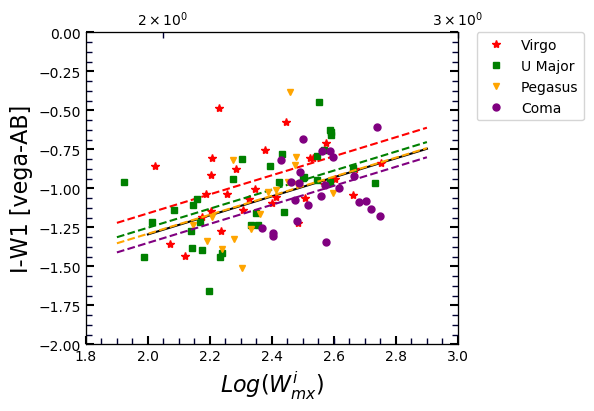

In [8]:
fig = py.figure(figsize=(4,4), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

Ntable   = np.genfromtxt('Neil_data.csv' , delimiter=',', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

pgc_neil = Ntable['PGC']
Sample   = Ntable['Sample']
Sample = np.asarray([s.strip() for s in Sample])
logWHIi = Ntable['logWHIi']
I_W1 = Ntable['Icmag']-Ntable['W1cmag']



wimx = np.linspace(2,2.9, 20)
i_w1 = (-8.95*(wimx-2.5)-21.34)-(-9.56*(wimx-2.5)-20.35)
ax.plot(wimx, i_w1, 'k-')

idx, =  np.where((Sample=='Virgo') )
ax.plot(logWHIi[idx], I_W1[idx], '*', label='Virgo', color='r')
slope =  9.56-8.95
fit, cov = curve_fit(linfit_m, I_W1[idx]/slope, logWHIi[idx])
b = fit[0]
b = -b*slope
x = np.linspace(1.9,2.9, 20)
ax.plot(x, slope*x+b, '--', color='r')



idx, =  np.where((Sample=='UMa') & (I_W1>-4))
ax.plot(logWHIi[idx], I_W1[idx], 's', label='U Major', ms=4, color='g')
slope =  9.56-8.95
fit, cov = curve_fit(linfit_m, I_W1[idx]/slope, logWHIi[idx])
b = fit[0]
b = -b*slope
ax.plot(x, slope*x+b, '--', color='g')


idx, =  np.where((Sample=='Pegasus') & (I_W1>-4))
ax.plot(logWHIi[idx], I_W1[idx], 'v', label='Pegasus', ms=4, color='orange')
slope =  9.56-8.95
fit, cov = curve_fit(linfit_m, I_W1[idx]/slope, logWHIi[idx])
b = fit[0]
b = -b*slope
ax.plot(x, slope*x+b, '--', color='orange')




idx, =  np.where(Sample=='Coma')
ax.plot(logWHIi[idx], I_W1[idx], '.', label='Coma', ms=10, color='purple')
fit, cov = curve_fit(linfit_m, I_W1[idx]/slope, logWHIi[idx])
b = fit[0]
b = -b*slope
ax.plot(x, slope*x+b, '--', color='purple')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


ax.set_ylabel('I-W1 [vega-AB]', fontsize=16) 
ax.set_xlabel(r'$Log(W^i_{mx}) $', fontsize=16) 


ax.tick_params(which='major', length=6, width=1.5, direction='in')
ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in')

ax.set_xlim(1.8,3)
ax.set_ylim(-2,0)


Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()

if True:
    y_ax = ax.twinx()
    y_ax.set_ylim(Ylm)
    y_ax.set_yticklabels([])
    y_ax.minorticks_on()
    y_ax.tick_params(which='major', length=6, width=1.5, direction='in')
    y_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in')        
    
    
if True:
    x_ax = ax.twiny()
    x_ax.set_xlim(Xlm)
    x_ax.set_xticklabels([])
    x_ax.minorticks_on()
    x_ax.tick_params(which='major', length=6, width=1.5, direction='in')
    x_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in') 
    x_ax.set_xscale('log')


In [9]:
Vmod_Dict = {}

for key in Vmod_Clusters:
    Vmod, Vmod_e = getVmod(key)
    name = Vmod_Clusters[key]['name']
    print key, name, '%.0f'%Vmod, '%.0f'%Vmod_e
    
    Vmod_Dict[name] = [Vmod, Vmod_e]

NEST_200092 Pegasus 3249 61
NEST_200037 NGC70 6619 80
NEST_200017 Abell 539 8995 87
NEST_200005 NGC410 4792 53
NEST_200006 NGC507 4660 64
NEST_100014 Antlia 3103 53
NEST_200003 Abell 262 4684 50
NEST_100001 Coma 7352 70
NEST_100003 Centaurus 3645 56
NEST_100002 Virgo 1516 45
NEST_100005 Abell 1367 7060 61
NEST_200045 NGC80 5499 42
NEST_100007 Abell 2151 (Hercules) 11353 121
NEST_100006 Hydra 4084 44
NEST_100008 Ursa Major 1141 13
NEST_200016 Abell 2634/66 8954 98
NEST_100030 Cancer 5025 71
NEST_200015 Fornax 1383 32
NEST_100018 NGC4065 7501 63
NEST_200012 Abell 400 7357 85


In [10]:
Vmod_Dict

{'Abell 1367': [7060.0, 61.0],
 'Abell 2151 (Hercules)': [11353.0, 121.0],
 'Abell 262': [4684.0, 50.0],
 'Abell 2634/66': [8954.0, 98.0],
 'Abell 400': [7357.0, 85.0],
 'Abell 539': [8995.0, 87.0],
 'Antlia': [3103.0, 53.0],
 'Cancer': [5025.0, 71.0],
 'Centaurus': [3645.0, 56.0],
 'Coma': [7352.0, 70.0],
 'Fornax': [1383.0, 32.0],
 'Hydra': [4084.0, 44.0],
 'NGC4065': [7501.0, 63.0],
 'NGC410': [4792.0, 53.0],
 'NGC507': [4660.0, 64.0],
 'NGC70': [6619.0, 80.0],
 'NGC80': [5499.0, 42.0],
 'Pegasus': [3249.0, 61.0],
 'Ursa Major': [1141.0, 13.0],
 'Virgo': [1516.0, 45.0]}

In [11]:
def add2Dict0(myDict, code, band, Mlim):
    
    if not code in myDict:
        myDict[code]={}
    myDict[code][band]= Mlim
    



def add2Dict(myDict, code, band, param, DM):
    
    if not code in myDict:
        myDict[code]={}
    if not band in myDict[code]:
        myDict[code][band]={}
    if not param in myDict[code][band]:
        myDict[code][band][param]={}
    myDict[code][band][param] = DM
##############################################   
table   = np.genfromtxt('cluster_code_Mlimit_revised.csv' , delimiter=',', 
                        filling_values=0, names=True, dtype=None, encoding=None)

mag_lims_u = table['u']
mag_lims_g = table['g']
mag_lims_r = table['r']
mag_lims_i = table['i']
mag_lims_z = table['z']
mag_lims_w1 = table['w1']
mag_lims_w2 = table['w2']
code = table['Code']  
Mlim_dict = {} 

for i, myCode in enumerate(code):
    myCode = myCode.strip()
    add2Dict0(Mlim_dict, myCode, 'u', mag_lims_u[i])
    add2Dict0(Mlim_dict, myCode, 'g', mag_lims_g[i])
    add2Dict0(Mlim_dict, myCode, 'r', mag_lims_r[i])
    add2Dict0(Mlim_dict, myCode, 'i', mag_lims_i[i])
    add2Dict0(Mlim_dict, myCode, 'z', mag_lims_z[i])
    add2Dict0(Mlim_dict, myCode, 'w1', mag_lims_w1[i])
    add2Dict0(Mlim_dict, myCode, 'w2', mag_lims_w2[i])
    
##############################################
table   = np.genfromtxt('cluster_DM_code.csv' , delimiter=',', 
                        filling_values=0, names=True, dtype=None, encoding=None)
DM_band = table['band']
DM_param = table['param']
DM_code = table['Code']
DM_cluster = table['Cluster']
DM_Ngal = table['Ngal']
DM = table['DM']
DMe = table['DMe']
##############################################
    
DM_Dict = {}    
for i, myCode in enumerate(DM_code):
    add2Dict(DM_Dict, myCode.strip(), DM_band[i].strip(), DM_param[i].strip(), np.float(DM[i]))  

In [12]:
table   = np.genfromtxt('band_gamma_rho.csv' , delimiter=',', 
                        filling_values=0, names=True, dtype=None, encoding=None)
band = table['band'] 
param = table['param'] 
rho = table['rho'] 
gamma = table['gamma'] 
gamma_rho_dict = {} 

for i, myband in enumerate(band):
    myband = myband.strip()
    add2Dict0(gamma_rho_dict, myband, param[i].strip(),[rho[i], gamma[i]])

In [13]:
band_Mag_Lims = {}

band_Mag_Lims['u']={}
band_Mag_Lims['u']['a'] = -16.51
band_Mag_Lims['u']['b'] = -16.43
band_Mag_Lims['u']['c'] = -16.42

band_Mag_Lims['g']={}
band_Mag_Lims['g']['a'] = -16.76
band_Mag_Lims['g']['b'] = -16.73
band_Mag_Lims['g']['c'] = -16.73

band_Mag_Lims['r']={}
band_Mag_Lims['r']['a'] = -16.90
band_Mag_Lims['r']['b'] = -16.90
band_Mag_Lims['r']['c'] = -16.90

band_Mag_Lims['i']={}
band_Mag_Lims['i']['a'] = -17.
band_Mag_Lims['i']['b'] = -17.
band_Mag_Lims['i']['c'] = -17.

band_Mag_Lims['z']={}
band_Mag_Lims['z']['a'] = -17.
band_Mag_Lims['z']['b'] = -17.
band_Mag_Lims['z']['c'] = -17.

band_Mag_Lims['w1']={}
band_Mag_Lims['w1']['a'] = -16.10
band_Mag_Lims['w1']['aa'] = -16.10
band_Mag_Lims['w1']['b'] = -16.10
band_Mag_Lims['w1']['c'] = -16.10


band_Mag_Lims['w2']={}
band_Mag_Lims['w2']['a'] = -15.50
band_Mag_Lims['w2']['b'] = -15.50
band_Mag_Lims['w2']['c'] = -15.50


In [14]:
def biasFuc2(M, a, b, Mlim=-17):
    
    if M>Mlim:
        return 0.
    return a*(np.abs(M-Mlim))**b
###############################################
def biasFuc3(M, band, Mlim=-17, param='a'):
    
    a = 0
    b = 0
    c = 0 
    d = 0
    
    if param=='a':
        if band=='u':
            a,b,c,d = 0.01075663,  0.03733353, -0.00872326,  0.00162847
        elif band=='g':
            a,b,c,d = 4.05097436e-03,  1.56565930e-02, -8.08741792e-06,  1.21480831e-03
        elif band=='r':
            a,b,c,d = 0.00475068, 0.01815473, 0.00368331, 0.0017712   
        elif band=='i':
            a,b,c,d = 0.00365145,  0.0126347,  -0.0028016,   0.00108302
        elif band=='z':
            a,b,c,d = 0.00339919,  0.01143001, -0.00297949,  0.00089995    
        elif band=='w1':
            a,b,c,d = 2.07681457e-03,  6.14984337e-03, -2.05867486e-03,  2.95011155e-05
        elif band=='w2':
            a,b,c,d = 0.00254991, 0.00983256, 0.00398445, 0.0011863          
    elif param=='b':
        if band=='u':
            a,b,c,d = 0.00219532,  0.01159092, -0.00984921,  0.00049964
        elif band=='g':
            a,b,c,d = 0.00617134, 0.02633942, 0.0047418,  0.00188963
        elif band=='r':
            a,b,c,d = 0.00267319, 0.01251704, 0.01030005, 0.00156411 
        elif band=='i':
            a,b,c,d = 2.54981887e-03,  9.32913662e-03, -8.23081230e-03,  4.38998332e-05
        elif band=='z':
            a,b,c,d = 0.00031256,  0.00068169, -0.00302575,  0.00015389 
        elif band=='w1':
            a,b,c,d = 0.00057635,  0.00413372, -0.0043978,   0.00013165
        elif band=='w2':
            a,b,c,d = 0.00012771,  0.00110506, -0.00033733,  0.00013241
    elif param=='c':
        if band=='u':
            a,b,c,d = 0.00267222,  0.01350231, -0.01009549,  0.00062754
        elif band=='g':
            a,b,c,d = 0.00705243, 0.03165107, 0.01312027, 0.00250333
        elif band=='r':
            a,b,c,d = 0.00214648, 0.01095484, 0.00642069, 0.00133009 
        elif band=='i':
            a,b,c,d = 0.00388246,  0.01407847, -0.00149403,  0.00090364
        elif band=='z':
            a,b,c,d = 0.00316113, 0.01361645, 0.01666276, 0.00238318 
        elif band=='w1':
            a,b,c,d = 0.00128349, 0.00351322, 0.00836834, 0.00029666
        elif band=='w2':
            a,b,c,d = 0.00177332, 0.0056317,  0.01604937, 0.00124119
        
    X = M-Mlim
    if M>Mlim:
        return 0.
    return  a*X**3+ b*X**2+c*X+d    
###############################################

grandClustersTable = {}

for i, cc in enumerate(DM_code):
    cc = cc.strip()
    band = DM_band[i].strip()
    param = DM_param[i].strip()
    
    print cc, band, param
    
    Cluster_Mlim = Mlim_dict[cc][band] - DM[i]
    band_lim = band_Mag_Lims[band][param]
    rho_gamma = gamma_rho_dict[band][param]
    rho = rho_gamma[0]
    gamma = rho_gamma[1]
#     _ = biasFuc2(Cluster_Mlim, rho, gamma, Mlim=band_lim)
    
    
    cluster_bias = biasFuc3(Cluster_Mlim, band, Mlim=band_lim, param=param)
    
    
    
    DM_modified = DM[i]+cluster_bias  
    Vmod_arr = Vmod_Dict[DM_cluster[i].strip()]
    
    
    Vmod = Vmod_arr[0]
    Vmod_e = Vmod_arr[1]
    
    Dmpc = 10**((DM_modified-25.)/5.)
    Dmpc_e = (DMe[i]*Dmpc*np.log(10))/5
    
    H0 = Vmod/Dmpc
    H0e = H0*np.sqrt(Vmod_e**2/Vmod**2 + Dmpc_e**2/Dmpc**2)

    rowDict = {}
    rowDict['name']   = DM_cluster[i]
    rowDict['Ngal']   = DM_Ngal[i]
    rowDict['DMo']    = DM[i]
    rowDict['bias']   = cluster_bias
    rowDict['DM']     = DM_modified
    rowDict['DMe']    = DMe[i]
    rowDict['Dmpc']   = Dmpc
    rowDict['Dmpc_e'] = Dmpc_e
    rowDict['H0']     = H0
    rowDict['H0e']    = H0e
    rowDict['Vmod']   = Vmod
    rowDict['Vmod_e'] = Vmod_e
    
    rowDict['DMbias'] = 0.

    if band=='g' and param=='b':
        rowDict['DMbias'] = 0
    elif band=='g' and param=='c':
        rowDict['DMbias'] = 0
    elif band=='w1' and param=='b':
        rowDict['DMbias'] = 0.04
    elif band=='w1' and param=='c':
        rowDict['DMbias'] = 0.11
    elif band=='w2' and param=='b':
        rowDict['DMbias'] = 0.06
    elif band=='w2' and param=='c':
        rowDict['DMbias'] = 0.17
        
    add2Dict(grandClustersTable, cc, band.strip(), param.strip(), rowDict)
    
#     print cc, DM_cluster[i], '&', band, param, DM_Ngal[i], DM[i], '%.3f'%cluster_bias, '%.2f'%DM_modified, DMe[i], '%.2f'%Dmpc, '%.2f'%Dmpc_e, '%.2f'%H0, '%.2f'%H0e 
    
    if param=='d':
        print DM_cluster[i],'|     &   &   '+band.upper()+'  &  TF$_{'+band.upper()+'cur}$ &', DM_Ngal[i], ' & %.2f'%DM[i], ' & %.3f'%cluster_bias, ' & %.2f'%DM_modified+'$\pm$'+'%.2f'% DMe[i], ' & %.2f'%Dmpc+'$\pm$'+'%.2f'%Dmpc_e, ' & %.2f'%H0+'$\pm$'+'%.2f  \\\\'%H0e

V u a
U u a
Pe u a
N5 u a
N41 u a
Ca u a
A1 u a
Co u a
A4 u a
N8 u a
N7 u a
N40 u a
A2 u a
He u a
V u b
U u b
Pe u b
N5 u b
N41 u b
Ca u b
N8 u b
N7 u b
A1 u b
Co u b
A4 u b
N40 u b
A2 u b
He u b
V u c
U u c
Pe u c
N41 u c
N5 u c
Ca u c
N8 u c
N7 u c
A1 u c
Co u c
A4 u c
N40 u c
A2 u c
He u c
V g a
U g a
Pe g a
N5 g a
N41 g a
Ca g a
N7 g a
N8 g a
A1 g a
Co g a
A4 g a
N40 g a
A2 g a
He g a
V g b
U g b
Pe g b
N5 g b
N41 g b
Ca g b
N8 g b
N7 g b
A1 g b
Co g b
A4 g b
N40 g b
A2 g b
He g b
V g c
U g c
Pe g c
N41 g c
N5 g c
Ca g c
N8 g c
N7 g c
A1 g c
Co g c
A4 g c
N40 g c
A2 g c
He g c
V r a
U r a
Pe r a
N5 r a
N41 r a
Ca r a
N8 r a
N7 r a
A1 r a
Co r a
A4 r a
N40 r a
A2 r a
He r a
V r b
U r b
Pe r b
N5 r b
N41 r b
Ca r b
N8 r b
N7 r b
A1 r b
Co r b
A4 r b
N40 r b
A2 r b
He r b
V r c
U r c
Pe r c
N5 r c
N41 r c
Ca r c
N8 r c
N7 r c
Co r c
A1 r c
A4 r c
N40 r c
A2 r c
He r c
V i a
U i a
Pe i a
N5 i a
N41 i a
Ca i a
N8 i a
N7 i a
A1 i a
Co i a
A4 i a
N40 i a
A2 i a
He i a
V i b
U i b
Pe i b
N

In [15]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [16]:
symcol = {}
symcol['V']  = 'black'
symcol['U']  = 'blue'
symcol['F']  = 'green'
symcol['Ce'] = 'dodgerblue'
symcol['An'] = 'olive'
symcol['Pe'] = 'darkgreen'
symcol['Hy'] = 'm'
symcol['A2'] = 'darkgoldenrod'
symcol['N41'] = 'orchid'
symcol['N5'] = 'firebrick'
symcol['Ca'] = 'sienna'
symcol['N8'] = 'slateblue'
symcol['N7'] = 'chocolate'
symcol['A1'] = 'red'
symcol['Co'] = 'maroon'
symcol['A4'] = 'deeppink'
symcol['N40']= 'magenta'
symcol['A5'] = 'crimson'
symcol['A26'] = 'purple'
symcol['He'] = 'indigo'

In [17]:
def constant(D, DD):
    return DD

def Plot_compareD(ax, band1, band2):
    param1 = 'a'
    
    
    if band1!=band2:

        param2 = 'a'
        
        X = []
        Y = []
        Ye = []

        for code in grandClustersTable:
          if not code=='A26':
            myCluster = grandClustersTable[code]
            if band1 in myCluster and band2 in myCluster:
                Vmod = myCluster[band1][param1]['Vmod']
                D1  = myCluster[band1][param1]['Dmpc']
                D1e = myCluster[band1][param1]['Dmpc_e']
                D2  = myCluster[band2][param2]['Dmpc']
                D2e = myCluster[band2][param2]['Dmpc_e']
                Delta_D  = D2-D1
                Delta_De = np.sqrt(D1e**2+D2e**2)

                ax.errorbar(Vmod, Delta_D, yerr=Delta_De, fmt='o', color=symcol[code])

                X.append(Vmod)
                Y.append(Delta_D)
                Ye.append(Delta_De)

 
        ax.plot([0,12000], [0,0], 'k:') 

    X = np.asarray(X)                
    Y = np.asarray(Y)
    Ye = np.asarray(Ye)
    fit, cov = curve_fit(constant, X , Y, sigma=Ye)
    H0_fit  = np.exp(fit[0])
    H0e_fit = H0_fit*np.sqrt(cov[0])
    
#     ax.text(2000,-12,r'$\langle D^*_{i}-D^*_{W1} \rangle$'+"=%.1f" % H0_fit+'$\pm$'+"%.1f" % H0e_fit, fontsize=14)

    x_ax, y_ax = set_axes(ax, (500, 12000), (-15,20), fontsize=14)    
    
    return x_ax, y_ax


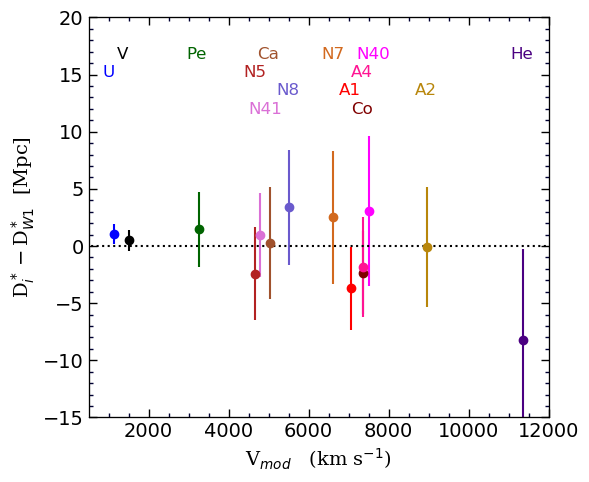

In [18]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

band1  = 'w1'  # base band


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareD(ax, 'w1', 'i')
ax.set_ylabel('D'+r'$^*_{i}-$'+'D'+r'$^*_{W1}$' + '  [Mpc]', fontsize=14, fontdict=font)
# plt.setp(ax.get_xticklabels(), visible=False)



ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=14, fontdict=font)
plt.subplots_adjust(hspace=.07, wspace=0)


pos = {}
pos['V'] = -0.02
pos['U'] = -0.04
pos['A26'] = -0.06
pos['Ca'] = -0.02
pos['Pe'] = -0.02
pos['N5'] = -0.04
pos['A4'] = -0.04
pos['N7'] = -0.02
pos['N41'] = -0.08
pos['N8'] = -0.06
pos['A2'] = -0.06
pos['A1'] = -0.06
pos['Co'] = -0.08
pos['N40'] = -0.02
pos['He'] = -0.02
pos['F'] = -0.02

Vmods = []
codes = []
for code in grandClustersTable:
  if not code=='A26':
    myCluster = grandClustersTable[code]
    if 'i' in myCluster:
        Vmod = myCluster['i']['a']['Vmod']
        Vmods.append(Vmod)
        codes.append(code)

indx = np.argsort(Vmods)
for i in indx:
        ax.text(Vmods[i]-300, 18+80*pos[codes[i]], codes[i], fontsize=12, color=symcol[codes[i]])
        p+=1

In [19]:
from matplotlib.ticker import MultipleLocator

def myHubble(D, H0):
    return H0


def plotHubble(ax, band, param, Dlim = 50, labels=False, DMcorrect=0, inTile=False):
    
#     band = 'u'
#     param = 'b'
    
    include_A26 = False
    if band in ['w1', 'w2'] and param in ['a','b']:
        include_A26 = True

    X  = []
    Y  = []
    Ye = []
    Ds = []
    H0s = []
    codes=[]
    
    Vs = []
    Ves = []
    DMs = []
    DMes = []
    
    for i, code in enumerate(grandClustersTable):
        myCluster = grandClustersTable[code]
        if band in myCluster:
            if param in myCluster[band]:
                Vmod = myCluster[band][param]['Vmod']
                Vmod_e = myCluster[band][param]['Vmod_e']
#                 Dmpc  = myCluster[band][param]['Dmpc']
#                 Dmpc_e = myCluster[band][param]['Dmpc_e']
                
                DM  = myCluster[band][param]['DM']+DMcorrect
                DMe = myCluster[band][param]['DMe']
                
                Dmpc = 10**((DM-25.)/5.)
                Dmpc_e = (DMe*Dmpc*np.log(10))/5

                H0 = Vmod/Dmpc
                H0e = H0*np.sqrt(Vmod_e**2/Vmod**2 + Dmpc_e**2/Dmpc**2)

                if (Dmpc>Dlim and code!='A26') or (code=='A26' and include_A26==True):
    
                    dye = 'k'
                    if labels: dye=symcol[code]
                    ax.errorbar(Vmod, H0, xerr=Vmod_e, yerr=H0e, color='k', fmt='o', capsize=2, 
                            elinewidth=0.5, capthick=0.5, ms=5, mfc=dye)
                    X.append(Dmpc)
                    Y.append(H0)
                    Ye.append(H0e)
                    
                    Ves.append(Vmod_e)
                    DMs.append(DM)
                    DMes.append(DMe)
                    
                else:
                    dye = 'k'
                    if labels: dye=symcol[code]
                    ax.errorbar(Vmod, H0, xerr=Vmod_e, yerr=H0e, color=dye, fmt='o', capsize=2, 
                            elinewidth=0.5, capthick=0.5, ms=5, mfc='white')   

                Ds.append(Dmpc)
                codes.append(code)
                H0s.append(H0)
                Vs.append(Vmod)

    X = np.asarray(X)                
    Y = np.asarray(Y)
    Ye = np.asarray(Ye)
    fit, cov = curve_fit(myHubble, X , np.log(Y), sigma=Ye/Y)
    H0_fit  = np.exp(fit[0])
    H0e_fit = H0_fit*np.sqrt(cov[0])

    chi2 = np.sum(((Y-H0_fit)/Ye)**2)
    H_rms = np.sqrt(np.sum((Y-H0_fit)**2)/(len(X)))

    He_max = np.max([H0e_fit, H_rms])

    if labels:
        Vs = np.asarray(Vs)
        H0s = np.asarray(H0s)
        indx = np.argsort(Vs)
        for t, i in enumerate(indx):
            ax.text(Vs[i]-200, (58-3*(t%4)), codes[i], color=symcol[codes[i]])

## Keep this, Bayesian approach
#     Vs   = np.asarray(Vs)   
#     Ves  = np.asarray(Ves) 
#     DMs  = np.asarray(DMs) 
#     DMes = np.asarray(DMes) 
#     Ho_fit, _ = linMC_H0(DMs, Vs, DMes, Ves, nwalkers=100, nsteps=5000, ignore=1000)
#     print 'Bayesian', band, param, Ho_fit
    if not inTile:
        x_ax, y_ax = set_axes(ax, (0, 12000), (45,120), fontsize=14) 
    else:
        x_ax, y_ax = set_axes(ax, (0, 12000), (45,120), fontsize=12) 
    
    ax.set_yscale('log')
    
    if not inTile:
        ax.set_xticks(np.arange(0, 14000, step=2000))
    else:
        ax.set_xticks(np.arange(2000, 12000, step=2000))
        
    from matplotlib.ticker import NullFormatter
    ax.yaxis.set_major_formatter(NullFormatter())  
    ax.yaxis.set_minor_formatter(NullFormatter())
    
#     ax.minorticks_on()    
#     ax.tick_params(which='minor', length=10, color='#000033', width=1.0, direction='in')
    ax.yaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_minor_locator(MultipleLocator(5))
    
#     if not inTile:
    plt.yticks([50,60,70,80,90,100,110], ('50','60','70','80','90','100','110'))
#     else:
#         plt.yticks([60,70,80,90,100], ('60','70','80','90','100'))

    ax.set_yticks(np.arange(50,120, step=10))
    

    y_ax.set_yticks(np.arange(50,120, step=10))
    y_ax.set_yscale('log')
    y_ax.yaxis.set_major_formatter(NullFormatter())  
    y_ax.yaxis.set_minor_formatter(NullFormatter())
    y_ax.yaxis.set_major_locator(MultipleLocator(10))
    y_ax.yaxis.set_minor_locator(MultipleLocator(5))
    
    
    x_ax.set_xticks(np.arange(0, 14000, step=2000))

    
    for tick in y_ax.yaxis.get_major_ticks():
           tick.label1.set_visible(False)

    ax.plot([4000,12000],[(H0_fit), (H0_fit)], 'r-')
    v = np.linspace(10,12000,100)
    ax.plot(v, H0_fit*(v+200)/v, 'k:', linewidth=1)
    ax.plot(v, H0_fit*(v-200)/v, 'k:', linewidth=1)


    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = 0.6*Xlm[0]+0.4*Xlm[1]
    y0 = 0.85*Ylm[0]+0.15*Ylm[1]
    y1 = 0.95*Ylm[0]+0.05*Ylm[1]
    unit =''
    fntsize = 12
    col = 'k'
    
    if labels:
        x0 = 0.40*Xlm[0]+0.50*Xlm[1]
        y0 = 0.25*Ylm[0]+0.75*Ylm[1] 
        y1 = 0.35*Ylm[0]+0.65*Ylm[1] 
        fntsize = 14
        col='maroon'
        unit= '   km/s/Mpc'
    
    ax.text(x0,y0, r"$H_0 = $"+"%.1f" % H0_fit+'$\pm$'+"%.1f" % H0e_fit,fontsize=fntsize, color=col)
    ax.text(x0,y1, r"$rms = $"+"%.1f" % H_rms+unit,fontsize=12, color='k')
      
    return x_ax, y_ax


Text(6100,110,'$TF_{W1}$')

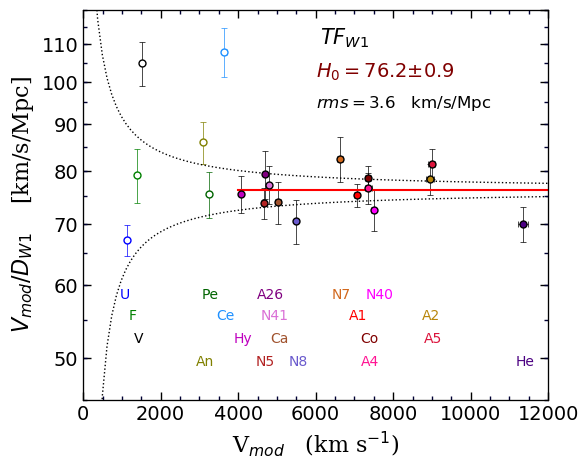

In [20]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

x_ax, y_ax = plotHubble(ax, 'w1', 'a', labels=True, DMcorrect=0.0)

ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=16, fontdict=font)
ax.set_ylabel(r'$V_{mod}/D_{W1}$'+'    [km/s/Mpc]', fontsize=16, fontdict=font)
ax.text(6100, 110,  r'$TF_{W1}$', fontsize=15, color='black', fontdict=font)

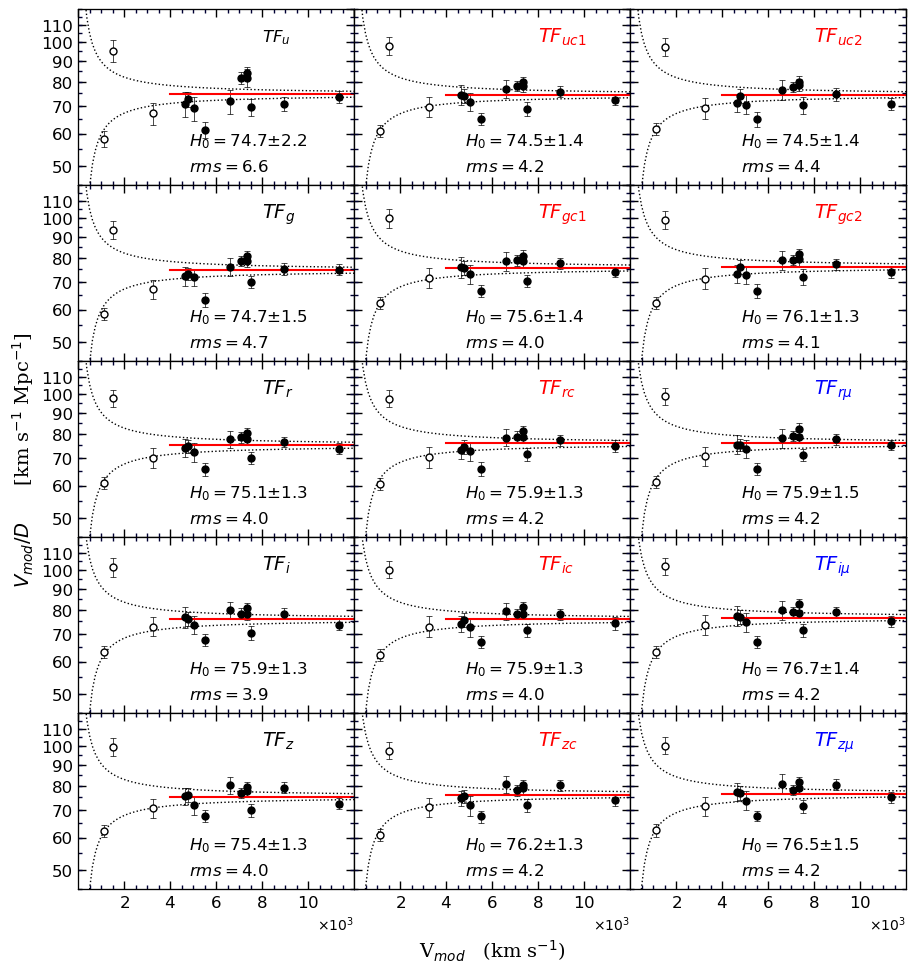

In [21]:

dye = {"u":"blue","g":"green","r":"red","i":"orange","z":"maroon","w1":"purple", 'w2': "brown"}

fig = py.figure(figsize=(9, 11), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(5,3) ; p=0



ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'u', 'a', DMcorrect=0, inTile=True)
ax.text(8000, 100,  r'$TF_{u}$', fontsize=12)
# ax.set_ylabel(r'$V_{mod}/D$'+' [km/s/Mpc]', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'u', 'b', DMcorrect=0, inTile=True)
ax.text(8000, 100,  r'$TF_{uc1}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False) 

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'u', 'c', DMcorrect=0, inTile=True)
ax.text(8000, 100,  r'$TF_{uc2}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False) 

###################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'g', 'a', DMcorrect=0, inTile=True)
ax.text(8000, 100,  r'$TF_{g}$', fontsize=14)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'g', 'b', DMcorrect=-0.07, inTile=True)
ax.text(8000, 100,  r'$TF_{gc1}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False) 
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'g', 'c', DMcorrect=-0.07, inTile=True)
ax.text(8000, 100,  r'$TF_{gc2}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False) 
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)
###################


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'r', 'a', DMcorrect=0, inTile=True)
ax.text(8000, 100,  r'$TF_{r}$', fontsize=14)
# plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$V_{mod}/D$'+'      [km s'+r'${^{-1}}$'+' Mpc'+r'${^{-1}}$'+']    ', fontsize=14, fontdict=font)


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'r', 'b', DMcorrect=0, inTile=True)
ax.text(8000, 100,  r'$TF_{rc}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'r', 'c', DMcorrect=0, inTile=True)
ax.text(8000, 100,  r'$TF_{r \mu}$', fontsize=14, color='b')
plt.setp(ax.get_yticklabels(), visible=False)

###################


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'i', 'a', DMcorrect=0, inTile=True)
ax.text(8000, 100,  r'$TF_{i}$', fontsize=14)
# ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'i', 'b', DMcorrect=0, inTile=True)
ax.text(8000, 100,  r'$TF_{i  c}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False) 
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'i', 'c', DMcorrect=0, inTile=True)
ax.text(8000, 100,  r'$TF_{i \mu}$', fontsize=14, color='b')
plt.setp(ax.get_yticklabels(), visible=False) 
ax.set_xlabel(r'$D$'+'  [Mpc]', fontsize=14, fontdict=font)

###################


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'z', 'a', inTile=True)
ax.text(8000, 100,  r'$TF_{z}$', fontsize=14)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
# ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'z', 'b', inTile=True)
ax.text(8000, 100,  r'$TF_{zc}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=14, fontdict=font, labelpad=20)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
# ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'z', 'c', DMcorrect=0, inTile=True)
ax.text(8000, 100,  r'$TF_{z \mu}$', fontsize=14, color='b')
plt.setp(ax.get_yticklabels(), visible=False)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

plt.subplots_adjust(hspace=0, wspace=0)




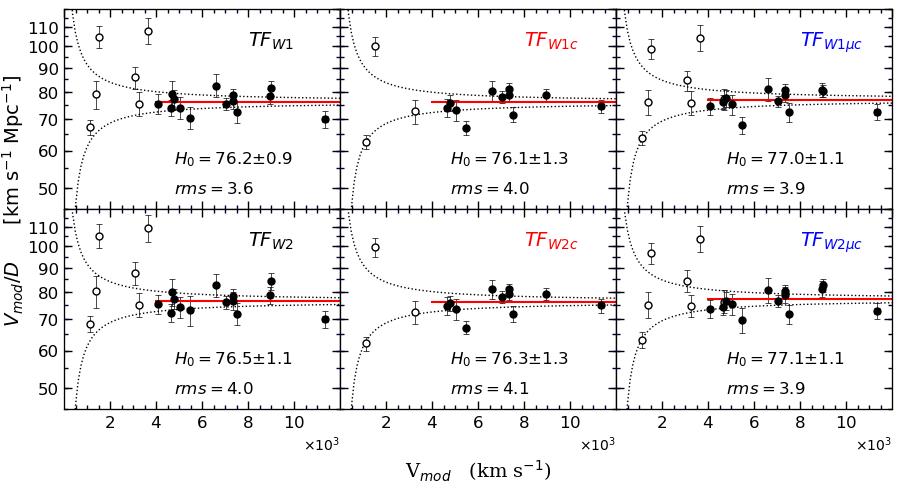

In [22]:

dye = {"u":"blue","g":"green","r":"red","i":"orange","z":"maroon","w1":"purple", 'w2': "brown"}

fig = py.figure(figsize=(9, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(2,3) ; p=0


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w1', 'a', inTile=True)
ax.text(8000, 100,  r'$TF_{W1}$', fontsize=14)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w1', 'b', DMcorrect=0.04, inTile=True)
ax.text(8000, 100,  r'$TF_{W1 c}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w1', 'c', DMcorrect=0.11, inTile=True)
ax.text(8000, 100,  r'$TF_{W1 \mu c}$', fontsize=14, color='b')
plt.setp(ax.get_yticklabels(), visible=False)


###################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w2', 'a', inTile=True)
ax.text(8000, 100,  r'$TF_{W2}$', fontsize=14)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w2', 'b', DMcorrect=0.05, inTile=True)
ax.text(8000, 100,  r'$TF_{W2 c}$', fontsize=14, color='r')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=14, fontdict=font, labelpad=20)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = plotHubble(ax, 'w2', 'c', DMcorrect=0.17, inTile=True)
ax.text(8000, 100,  r'$TF_{W2 \mu c}$', fontsize=14, color='b')
plt.setp(ax.get_yticklabels(), visible=False)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))


ax.annotate(r'$V_{mod}/D$'+'      [km s'+r'${^{-1}}$'+' Mpc'+r'${^{-1}}$'+']    ', (0.000,0.85), xycoords='figure fraction', size=14, color='black', rotation=90)

plt.subplots_adjust(hspace=0, wspace=0)

In [23]:
def Plot_compareDM(ax, band1, band2, param2, color='k'):
    param1 = 'a'

    DMs = []
    DMes = []
    
    BBOL = False
    opticals = ['u', 'g', 'r', 'i', 'z']
    if band1 in opticals or band2 in opticals:
        BBOL = True
    elif param2=='b':
        BBOL = True
    
    for code in grandClustersTable:
      if BBOL and code =='A26':
        continue
      else:
        myCluster = grandClustersTable[code]
        if band1 in myCluster and band2 in myCluster:
            try: 
                Vmod = myCluster[band1][param1]['Vmod']
                D1  = myCluster[band1][param1]['Dmpc']
                D1e = myCluster[band1][param1]['Dmpc_e']
                DM1  = myCluster[band1][param1]['DM']
                DM1e = myCluster[band1][param1]['DMe']            

                D2  = myCluster[band2][param2]['Dmpc']
                D2e = myCluster[band2][param2]['Dmpc_e']
                DM2  = myCluster[band2][param2]['DM']
                DM2e = myCluster[band2][param2]['DMe']             

                Delta_D  = D2-D1
                Delta_De = np.sqrt(D1e**2+D2e**2)

                Delta_DM  = DM2-DM1
                Delta_DMe = np.sqrt(DM1e**2+DM2e**2)            


                ax.errorbar(Vmod, Delta_DM, yerr=Delta_DMe, fmt='o', color='k', mfc=symcol[code], ms=8)

    #             if Vmod>4000:
                DMs.append(Delta_DM)
                DMes.append(Delta_DMe)
            except:
                pass

    
    if len(DMs)>0:
        DMs  = np.asarray(DMs)
        DMes = np.asarray(DMes)
        
        DM_av  = np.sum(DMs/DMes**2) / np.sum(1./DMes**2)
        DM_ave = np.sqrt(np.sum((DMs-DM_av)**2/DMes**2) / np.sum(1./DMes**2))
       
        ax.plot([0,20000], [DM_av,DM_av], '--', color = color)         
        
        
        
    ax.plot([-10,20000], [0,0], 'k-', alpha=0.4)
#     ax.plot([4000,4000], [-100,100], 'k:', alpha=0.8)
    
    ax.ticklabel_format(style='sci')

    x_ax, y_ax = set_axes(ax, (500, 12000), (-0.50,0.50), fontsize=14)    
    
    
    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = 0.90*Xlm[0]+0.10*Xlm[1]
    y0 = 0.9*Ylm[0]+0.10*Ylm[1]
    ax.text(x0,y0, r"$\langle \Delta \/ DM \rangle \/\/ = \/ $"+"%.2f" % DM_av+'$\pm$'+"%.2f" % DM_ave+'  mag',fontsize=14, color=color)
    

    return x_ax, y_ax

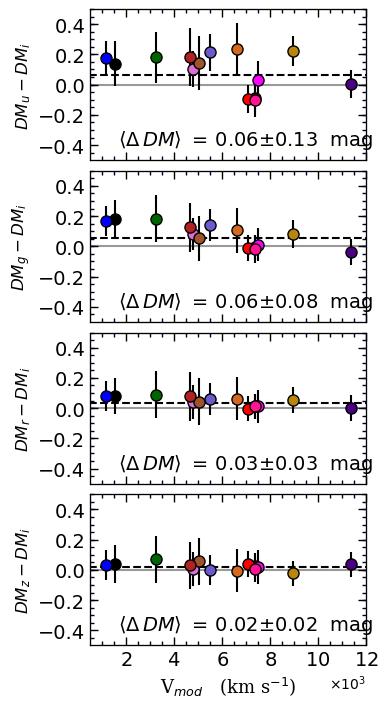

In [24]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

band1 = 'i'
            
fig = py.figure(figsize=(3, 12), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(6,1) ; p=0

####################################################
ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'u', 'a', color='k')
ax.set_ylabel(r'$DM_u - DM_{i}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

####################################################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'g', 'a', color='k')
ax.set_ylabel(r'$DM_g - DM_{i}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

####################################################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'r', 'a', color='k')
ax.set_ylabel(r'$DM_r - DM_{i}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

####################################################
ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'z', 'a', color='k')
ax.set_ylabel(r'$DM_z - DM_{i}$', fontsize=12, fontdict=font)
# plt.setp(ax.get_xticklabels(), visible=False)

####################################################

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'w1', 'a', color='k')
# ax.set_ylabel(r'$DM_{W1} - DM_{i}$', fontsize=12, fontdict=font)
# plt.setp(ax.get_xticklabels(), visible=False)

# ####################################################

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'w2', 'a', color='k')
# ax.set_ylabel(r'$DM_{W2} - DM_{i}$', fontsize=12, fontdict=font)

####################################################



# plt.setp(ax.get_xticklabels(), visible=False)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
ax.ticklabel_format(style='sci',scilimits=(1,3),axis='x', useMathText=True)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))



####################################################

ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))


plt.subplots_adjust(hspace=0.07, wspace=0.2)


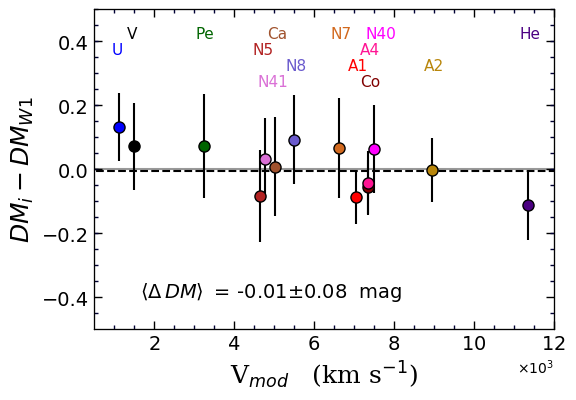

In [25]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

band1 = 'w1'
            
fig = py.figure(figsize=(5, 4), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0

####################################################
# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'u', 'a', color='k')
# ax.set_ylabel(r'$DM_u - DM_{W1}$', fontsize=12, fontdict=font)
# plt.setp(ax.get_xticklabels(), visible=False)

# ###################################################

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'g', 'a', color='k')
# ax.set_ylabel(r'$DM_g - DM_{W1}$', fontsize=12, fontdict=font)
# plt.setp(ax.get_xticklabels(), visible=False)
# ####################################################

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'r', 'a', color='k')
# ax.set_ylabel(r'$DM_r - DM_{W1}$', fontsize=12, fontdict=font)
# plt.setp(ax.get_xticklabels(), visible=False)
####################################################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'i', 'a', color='k')
ax.set_ylabel(r'$DM_i - DM_{W1}$', fontsize=18, fontdict=font)
# plt.setp(ax.get_xticklabels(), visible=False)
# ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
# ax.ticklabel_format(style='sci',scilimits=(1,3),axis='x', useMathText=True)
# ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
# ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))


pos = {}
pos['V'] = -0.02
pos['U'] = -0.04
pos['A26'] = -0.06
pos['Ca'] = -0.02
pos['Pe'] = -0.02
pos['N5'] = -0.04
pos['A4'] = -0.04
pos['N7'] = -0.02
pos['N41'] = -0.08
pos['N8'] = -0.06
pos['A2'] = -0.06
pos['A1'] = -0.06
pos['Co'] = -0.08
pos['N40'] = -0.02
pos['He'] = -0.02
pos['F'] = -0.02


Vmods = []
codes = []
for code in grandClustersTable:
    myCluster = grandClustersTable[code]
    if 'i' in myCluster:
        Vmod = myCluster['i']['a']['Vmod']
        Vmods.append(Vmod)
        codes.append(code)


Vmods = np.asarray(Vmods)
indx = np.argsort(Vmods)
for t, i in enumerate(indx):
    ax.text(Vmods[i]-200, 0.46+2.5*pos[codes[i]], codes[i], color=symcol[codes[i]], fontsize=11)

# ####################################################

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'z', 'a', color='k')
# ax.set_ylabel(r'$DM_z - DM_{W1}$', fontsize=12, fontdict=font)
# plt.setp(ax.get_xticklabels(), visible=False)
# ####################################################

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'w2', 'a', color='k')
# ax.set_ylabel(r'$DM_{W2} - DM_{W1}$', fontsize=12, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=18, fontdict=font)



ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(10,10), fontsize=14)


plt.subplots_adjust(hspace=0.07, wspace=0.2)


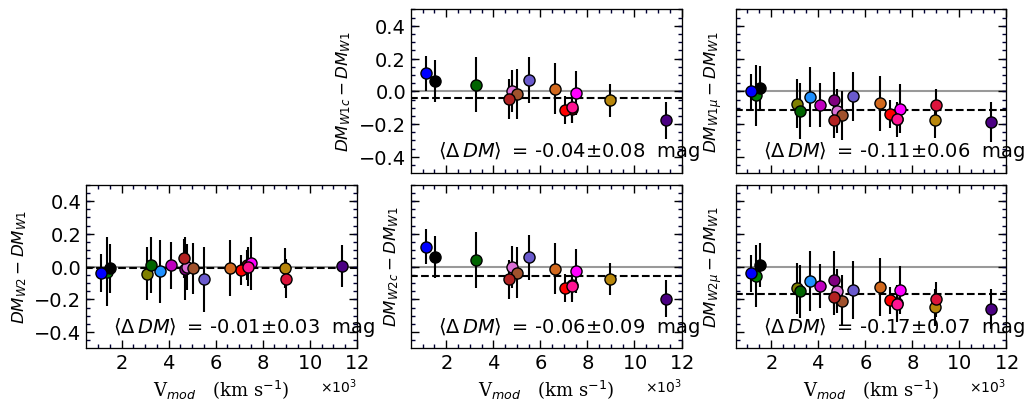

In [26]:


band1 = 'w1'
            
fig = py.figure(figsize=(10, 13), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(6,3) ; p=0

####################################################
# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'u', 'a', color='k')
# ax.set_ylabel(r'$DM_u - DM_{W1}$', fontsize=12, fontdict=font)
# plt.setp(ax.get_xticklabels(), visible=False)

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'u', 'b', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
# plt.setp(ax.get_yticklabels(), visible=False)
# ax.set_ylabel(r'$DM_{uc1} - DM_{W1}$', fontsize=12, fontdict=font)

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'u', 'c', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
# plt.setp(ax.get_yticklabels(), visible=False)
# ax.set_ylabel(r'$DM_{uc2} - DM_{W1}$', fontsize=12, fontdict=font)

# ####################################################

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'g', 'a', color='k')
# ax.set_ylabel(r'$DM_g - DM_{W1}$', fontsize=12, fontdict=font)
# plt.setp(ax.get_xticklabels(), visible=False)

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'g', 'b', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
# plt.setp(ax.get_yticklabels(), visible=False)
# ax.set_ylabel(r'$DM_{gc1} - DM_{W1}$', fontsize=12, fontdict=font)
# ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
# ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
# ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'g', 'c', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
# plt.setp(ax.get_yticklabels(), visible=False)
# ax.set_ylabel(r'$DM_{gc2} - DM_{W1}$', fontsize=12, fontdict=font)

# ####################################################

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'r', 'a', color='k')
# ax.set_ylabel(r'$DM_r - DM_{W1}$', fontsize=12, fontdict=font)
# plt.setp(ax.get_xticklabels(), visible=False)

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'r', 'b', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
# plt.setp(ax.get_yticklabels(), visible=False)
# ax.set_ylabel(r'$DM_{rc} - DM_{W1}$', fontsize=12, fontdict=font)

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'r', 'c', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
# plt.setp(ax.get_yticklabels(), visible=False)
# ax.set_ylabel(r'$DM_{r \mu} - DM_{W1}$', fontsize=12, fontdict=font)

# ####################################################


# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'i', 'a', color='k')
# ax.set_ylabel(r'$DM_i - DM_{W1}$', fontsize=12, fontdict=font)
# plt.setp(ax.get_xticklabels(), visible=False)
# ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
# ax.ticklabel_format(style='sci',scilimits=(1,3),axis='x', useMathText=True)
# ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
# ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'i', 'b', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
# plt.setp(ax.get_yticklabels(), visible=False)
# ax.set_ylabel(r'$DM_{ic} - DM_{W1}$', fontsize=12, fontdict=font)

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'i', 'c', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
# plt.setp(ax.get_yticklabels(), visible=False)

# ax.set_ylabel(r'$DM_{i \mu} - DM_{z}$', fontsize=12, fontdict=font)

# ####################################################

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'z', 'a', color='k')
# ax.set_ylabel(r'$DM_z - DM_{W1}$', fontsize=12, fontdict=font)
# plt.setp(ax.get_xticklabels(), visible=False)

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'z', 'b', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
# plt.setp(ax.get_yticklabels(), visible=False)
# ax.set_ylabel(r'$DM_{zc} - DM_{W1}$', fontsize=12, fontdict=font)

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, band1, 'z', 'c', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
# plt.setp(ax.get_yticklabels(), visible=False)
# ax.set_ylabel(r'$DM_{z \mu} - DM_{W1}$', fontsize=12, fontdict=font)

####################################################

p+=1
ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'w1', 'b', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
# plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W1  c} - DM_{W1}$', fontsize=12, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'w1', 'c', color='k')
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W1 \mu} - DM_{W1}$', fontsize=12, fontdict=font)

####################################################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'w2', 'a', color='k')
ax.set_ylabel(r'$DM_{W2} - DM_{W1}$', fontsize=12, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'w2', 'b', color='k')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W2  c} - DM_{W1}$', fontsize=12, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'w2', 'c', color='k')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W2 \mu} - DM_{W1}$', fontsize=12, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
ax.ticklabel_format(style='sci',scilimits=(1,3),axis='x', useMathText=True)

ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))


plt.subplots_adjust(hspace=0.07, wspace=0.2)


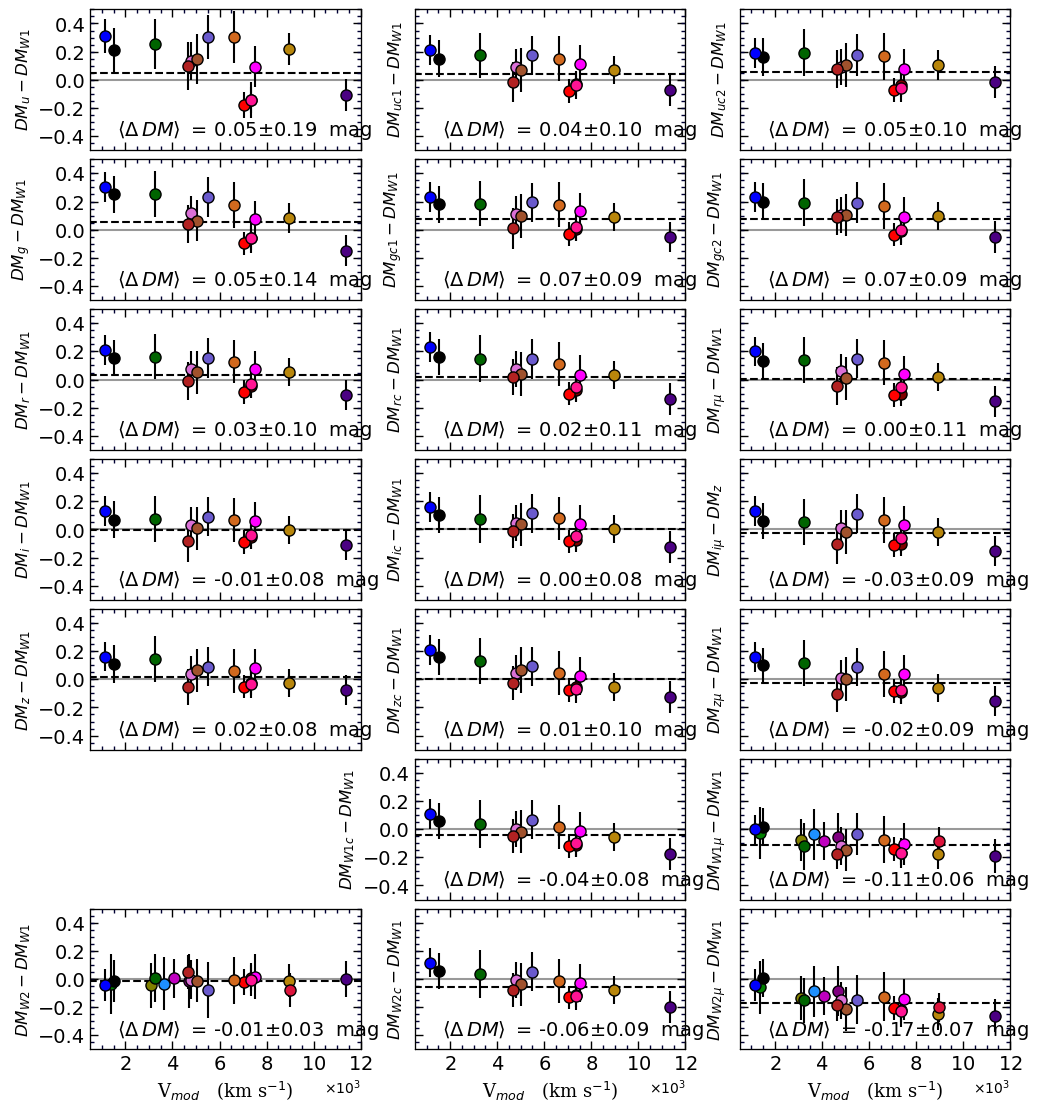

In [27]:


band1 = 'w1'
            
fig = py.figure(figsize=(10, 13), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(7,3) ; p=0

###################################################
ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'u', 'a', color='k')
ax.set_ylabel(r'$DM_u - DM_{W1}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'u', 'b', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{uc1} - DM_{W1}$', fontsize=12, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'u', 'c', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{uc2} - DM_{W1}$', fontsize=12, fontdict=font)

####################################################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'g', 'a', color='k')
ax.set_ylabel(r'$DM_g - DM_{W1}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'g', 'b', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{gc1} - DM_{W1}$', fontsize=12, fontdict=font)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'g', 'c', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{gc2} - DM_{W1}$', fontsize=12, fontdict=font)

####################################################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'r', 'a', color='k')
ax.set_ylabel(r'$DM_r - DM_{W1}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'r', 'b', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{rc} - DM_{W1}$', fontsize=12, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'r', 'c', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{r \mu} - DM_{W1}$', fontsize=12, fontdict=font)

####################################################


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'i', 'a', color='k')
ax.set_ylabel(r'$DM_i - DM_{W1}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
ax.ticklabel_format(style='sci',scilimits=(1,3),axis='x', useMathText=True)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'i', 'b', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{ic} - DM_{W1}$', fontsize=12, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'i', 'c', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

ax.set_ylabel(r'$DM_{i \mu} - DM_{z}$', fontsize=12, fontdict=font)

####################################################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'z', 'a', color='k')
ax.set_ylabel(r'$DM_z - DM_{W1}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'z', 'b', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{zc} - DM_{W1}$', fontsize=12, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'z', 'c', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{z \mu} - DM_{W1}$', fontsize=12, fontdict=font)

####################################################

p+=1
ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'w1', 'b', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
# plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W1  c} - DM_{W1}$', fontsize=12, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'w1', 'c', color='k')
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W1 \mu} - DM_{W1}$', fontsize=12, fontdict=font)

####################################################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'w2', 'a', color='k')
ax.set_ylabel(r'$DM_{W2} - DM_{W1}$', fontsize=12, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'w2', 'b', color='k')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W2  c} - DM_{W1}$', fontsize=12, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, band1, 'w2', 'c', color='k')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W2 \mu} - DM_{W1}$', fontsize=12, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
ax.ticklabel_format(style='sci',scilimits=(1,3),axis='x', useMathText=True)

ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))


plt.subplots_adjust(hspace=0.07, wspace=0.2)


[(0.029343102246956812, 0.03403197159894138, 0.034645393968938704)] 0.029343102246956812 0.034300277509279026


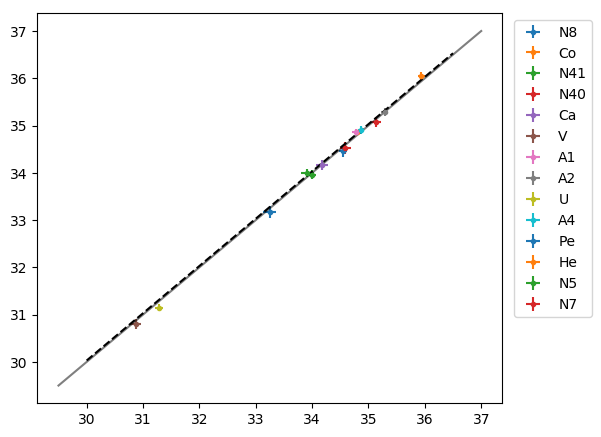

In [28]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

band1 = 'i'
param1 = 'a'

band2 = 'w1'
param2 = 'a'

Dm1lst = []
Dm2lst = []
Dm1lste = []
Dm2lste = []
for code in grandClustersTable:
    myCluster = grandClustersTable[code]
    if band1 in myCluster and band2 in myCluster:
        Vmod = myCluster[band1][param1]['Vmod']
        D1  = myCluster[band1][param1]['Dmpc']
        D1e = myCluster[band1][param1]['Dmpc_e']
        DM1  = myCluster[band1][param1]['DM']
        DM1e = myCluster[band1][param1]['DMe']            

        D2  = myCluster[band2][param2]['Dmpc']
        D2e = myCluster[band2][param2]['Dmpc_e']
        DM2  = myCluster[band2][param2]['DM']
        DM2e = myCluster[band2][param2]['DMe']
        
        ax.errorbar(DM1, DM2, xerr=DM1e, yerr=DM2e, fmt='.', label=code)
        if Vmod>4000:
            Dm1lst.append(DM1)
            Dm2lst.append(DM2)
            Dm1lste.append(DM1e)
            Dm2lste.append(DM2e)
        
ax.legend(loc=2, bbox_to_anchor=(1.01, 1.001))

ax.plot([29.5,37], [29.5,37], 'k-', alpha=0.5)

Dm1lst = np.asarray(Dm1lst)
Dm2lst = np.asarray(Dm2lst)
Dm1lste = np.asarray(Dm1lste)
Dm2lste = np.asarray(Dm2lste)

b, s =  linMCSlope1(Dm1lst, Dm2lst, Dm1lste, Dm2lste, nwalkers=100, nsteps=1000, ignore=100)
ax.plot([30,36.5], [30+b[0][0],36.5+b[0][0]], 'k--')

print b, np.median(s), np.std(s)

Text(0.5,0,'V$_{mod}$   (km s$^{-1}$)  [this study]')

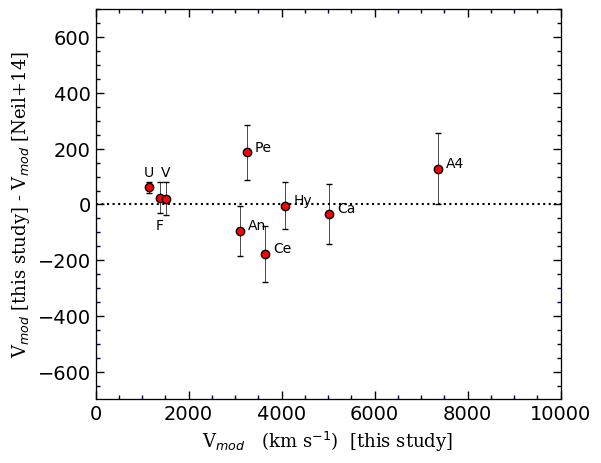

In [29]:
Neil_Vmod = {}

key = 'V'  # Virgo
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 1495.
Neil_Vmod[key]['Vmod_e'] = 37.

key = 'U'  # Ursa Major
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 1079.
Neil_Vmod[key]['Vmod_e'] = 14.

key = 'F'  # Fornax
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 1358.
Neil_Vmod[key]['Vmod_e'] = 45.

key = 'An'  # Antlia
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 3198.
Neil_Vmod[key]['Vmod_e'] = 74.

key = 'Ce'  # Centaurus
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 3823.
Neil_Vmod[key]['Vmod_e'] = 82.

key = 'Pe'  # Pegasus
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 3062.
Neil_Vmod[key]['Vmod_e'] = 78.

key = 'Hy'  # Hydra
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 4088.
Neil_Vmod[key]['Vmod_e'] = 72.


key = 'Ca'  # Cancer
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 5059.
Neil_Vmod[key]['Vmod_e'] = 82.


key = 'A4'  # A400
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 7228.
Neil_Vmod[key]['Vmod_e'] = 97.

key = 'A1367'  # 
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 6969.
Neil_Vmod[key]['Vmod_e'] = 93.


key = 'Coma'  # 
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 7370.
Neil_Vmod[key]['Vmod_e'] = 76.

key = 'A2634/66'  # 
Neil_Vmod[key] = {}
Neil_Vmod[key]['Vmod'] = 8938.
Neil_Vmod[key]['Vmod_e'] = 164.

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

for code in grandClustersTable:
    
    cluster = grandClustersTable[code]['w1']['a']
    
    if code in Neil_Vmod:
        Neilcls = Neil_Vmod[code]
#         print code, cluster['Vmod'], cluster['Vmod_e'], Neilcls['Vmod'], Neilcls['Vmod_e']
        
        myV   = cluster['Vmod']
        myVe  = cluster['Vmod_e']
        NeiV  = Neilcls['Vmod']
        NeiVe = Neilcls['Vmod_e']
        
        DeltaV  = myV - NeiV
        DeltaVe = np.sqrt(myVe**2+NeiVe**2) 
        
        ax.errorbar(myV, DeltaV, xerr=myVe*0, yerr=DeltaVe, 
                    fmt='o', capsize=2, 
                    elinewidth=0.5, capthick=1, ms=6, color='k', mfc='red')
        
        if myV<2000:
            
            if code!='F':
                ax.text(myV-100, DeltaV+DeltaVe+20, code)
            
            else:
                ax.text(myV-100, DeltaV-DeltaVe-60, code)
        else:
            ax.text(myV+170, DeltaV+5, code)
        
ax.plot([10,20000],[0,0], 'k:')

x_ax, y_ax = set_axes(ax, (0, 10000), (-700,700), fontsize=14)  

ax.set_ylabel('V'+r'$_{mod}$'+ ' [this study] - V'+r'$_{mod}$'+ ' [Neil+14]', fontsize=13, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')  [this study]', fontsize=13, fontdict=font)




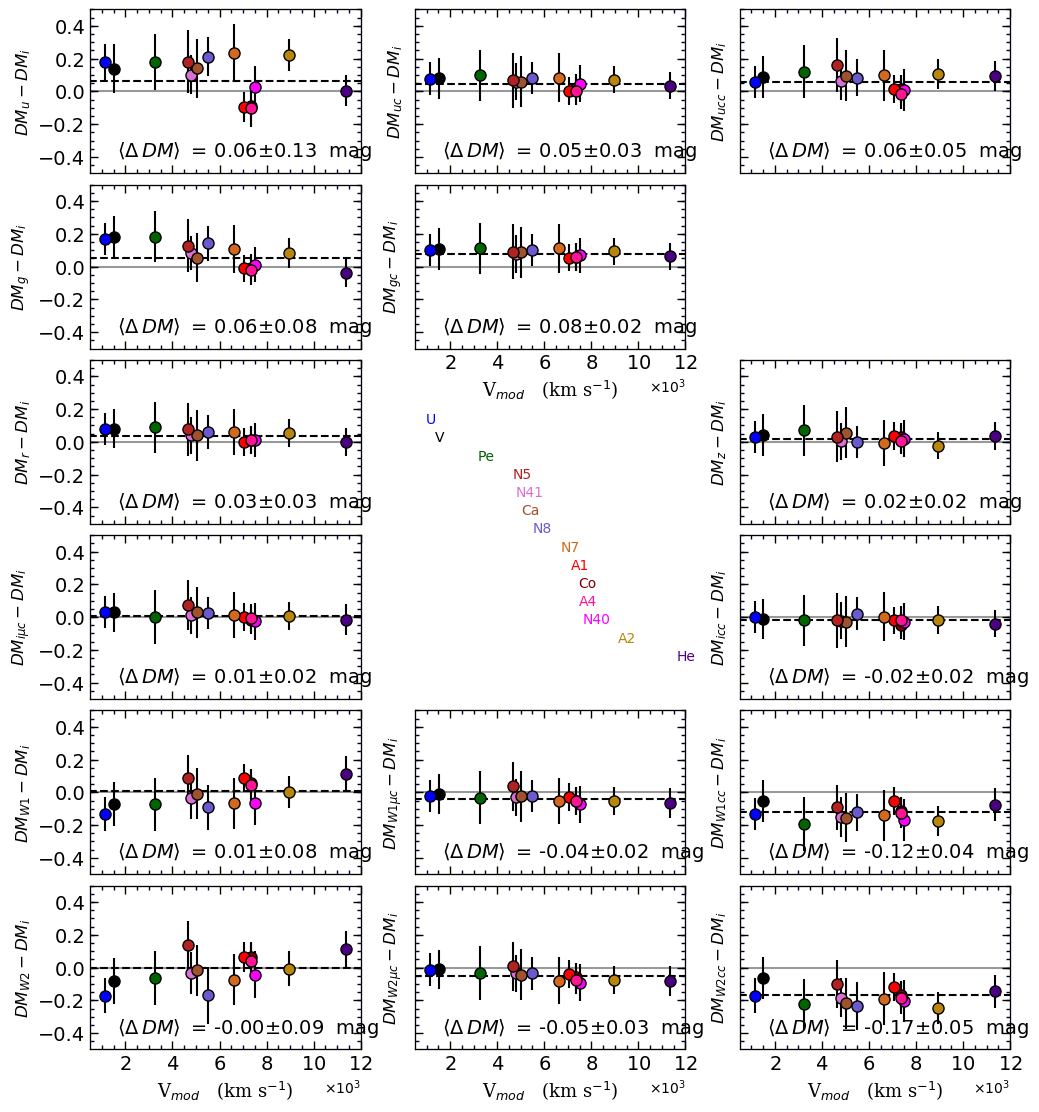

In [30]:

import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
            
fig = py.figure(figsize=(10, 13), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(6,3) ; p=0

####################################################
ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'u', 'a', color='k')
ax.set_ylabel(r'$DM_u - DM_{i}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'u', 'b', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{uc} - DM_{i}$', fontsize=12, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'u', 'c', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{ucc} - DM_{i}$', fontsize=12, fontdict=font)

####################################################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'g', 'a', color='k')
ax.set_ylabel(r'$DM_g - DM_{i}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=2
x_ax, y_ax = Plot_compareDM(ax, 'i', 'g', 'b', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{gc} - DM_{i}$', fontsize=12, fontdict=font)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)

# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = Plot_compareDM(ax, 'i', 'g', 'c', color='k')
# plt.setp(ax.get_xticklabels(), visible=False)
# plt.setp(ax.get_yticklabels(), visible=False)
# ax.set_ylabel(r'$DM_{gcc} - DM_{i}$', fontsize=12, fontdict=font)

####################################################


ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'r', 'a', color='k')
ax.set_ylabel(r'$DM_r - DM_{i}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

####****************************
####****************************
ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = set_axes(ax, (500, 11500), (-0.45,0.45), fontsize=14)

Vmods = []
codes = []
for code in grandClustersTable:
    myCluster = grandClustersTable[code]
    if 'i' in myCluster:
        Vmod = myCluster['i']['a']['Vmod']
        Vmods.append(Vmod)
        codes.append(code)


Vmods = np.asarray(Vmods)
indx = np.argsort(Vmods)
for t, i in enumerate(indx):
    ax.text(Vmods[i]-200, 0.1-0.1*(t%20), codes[i], color=symcol[codes[i]])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
x_ax.get_xaxis().set_visible(False)
y_ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)
x_ax.set_frame_on(False)
y_ax.set_frame_on(False)

####****************************
####****************************



ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'z', 'a', color='k')
ax.set_ylabel(r'$DM_z - DM_{i}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

####################################################

ax = plt.subplot(gs[p]) ; p+=2

x_ax, y_ax = Plot_compareDM(ax, 'i', 'i', 'b', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_{i \mu c} - DM_{i}$', fontsize=12, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'i', 'c', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{icc} - DM_{i}$', fontsize=12, fontdict=font)

####****************************
####****************************
# ax = plt.subplot(gs[p]) ; p+=1
# x_ax, y_ax = set_axes(ax, (500, 11500), (-0.45,0.45), fontsize=14)

# Vmods = []
# codes = []
# for code in grandClustersTable:
#     myCluster = grandClustersTable[code]
#     if 'i' in myCluster:
#         Vmod = myCluster['i']['a']['Vmod']
#         Vmods.append(Vmod)
#         codes.append(code)


# Vmods = np.asarray(Vmods)
# indx = np.argsort(Vmods)
# for t, i in enumerate(indx):
#     ax.text(Vmods[i]-200, 0.3-0.1*(t%8), codes[i], color=symcol[codes[i]])
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)
# x_ax.get_xaxis().set_visible(False)
# y_ax.get_yaxis().set_visible(False)
# ax.set_frame_on(False)
# x_ax.set_frame_on(False)
# y_ax.set_frame_on(False)

####****************************
####****************************

####################################################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w1', 'a', color='k')
ax.set_ylabel(r'$DM_{W1} - DM_{i}$', fontsize=12, fontdict=font)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w1', 'b', color='k')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W1 \mu c} - DM_{i}$', fontsize=12, fontdict=font)

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w1', 'c', color='k')
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W1cc} - DM_{i}$', fontsize=12, fontdict=font)

####################################################

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w2', 'a', color='k')
ax.set_ylabel(r'$DM_{W2} - DM_{i}$', fontsize=12, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w2', 'b', color='k')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W2 \mu c} - DM_{i}$', fontsize=12, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

ax = plt.subplot(gs[p]) ; p+=1
x_ax, y_ax = Plot_compareDM(ax, 'i', 'w2', 'c', color='k')
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W2cc} - DM_{i}$', fontsize=12, fontdict=font)
ax.set_xlabel('V'+r'$_{mod}$'+'   (km s'+r'$^{-1}$'+')', fontsize=13, fontdict=font)
ax.ticklabel_format(style='sci',scilimits=(1,3),axis='x', useMathText=True)

ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))


plt.subplots_adjust(hspace=0.07, wspace=0.2)

In [31]:
grandClustersTable['He']['w1']['b']

{'DM': 35.87495887224185,
 'DMbias': 0.04,
 'DMe': 0.07,
 'DMo': 35.85,
 'Dmpc': 149.6207317610748,
 'Dmpc_e': 4.823202531782764,
 'H0': 75.87852208963454,
 'H0e': 2.576256830990647,
 'Ngal': 33,
 'Vmod': 11353.0,
 'Vmod_e': 121.0,
 'bias': 0.024958872241849988,
 'name': u' Abell 2151 (Hercules) '}

In [34]:
def tfcode(band, param):
    
    s = band
    if band in ['w1', 'w2']:
        s = band.upper()
    if param=='a': 
        return s
    else: 
        if band in ['u', 'g']:
            if param=='b':
                s+= 'c1'
            else:
                s+= 'c2'
        else:
            if param=='b':
                s+= 'c'
            else:
                s+= ' \mu' 
        return s

    

for code in ['V', 'U', 'F', 'Pe', 'Ce', 'An', 'Hy', 'A26', 'N5', 'N41', 'Ca', 'N8', 'N7', 'A1', 'Co', 'A4', 'N40', 'A5', 'A2', 'He']:

    line = 0


    for band in ['u', 'g', 'r', 'i', 'z', 'w1', 'w2']:
        for param in ['a', 'b', 'c']:

            try:
                Clstr = grandClustersTable[code][band][param]

                DM_modified = Clstr['DM'] + Clstr['DMbias']
                Vmod = Clstr['Vmod']
                Vmod_e = Clstr['Vmod_e']
                Dmpc = 10**((DM_modified-25.)/5.)
                Dmpc_e = (Clstr['DMe']*Dmpc*np.log(10))/5
                H0 = Vmod/Dmpc
                H0e = H0*np.sqrt(Vmod_e**2/Vmod**2 + Dmpc_e**2/Dmpc**2)

                s = ''
                if line==0:
                    s = s + Clstr['name'] + ' & '
                    s = s + '%d'%Clstr['Vmod'] + '$\pm$' + '%d'%Clstr['Vmod_e'] + ' & '
                else: 
                    s += ' & & '

                print_band = band
                if band in ['w1', 'w2']:
                    print_band = band.upper()

                s = s + print_band  + ' & '
                s = s + 'TF$_{'+tfcode(band, param)+'}$' + ' & '
                s = s + '%d'%Clstr['Ngal'] + ' & '
                s = s + '%.2f'%Clstr['DMo'] + ' & '
                s = s + '%.3f'%Clstr['bias'] + ' & '
                
                if Clstr['DMbias']!=0:
                    s = s + '%.2f'%Clstr['DMbias'] + ' & '
                else:
                    s += ' & ' 
                
                s = s + '%.2f'%DM_modified + '$\pm$' + '%.2f'%Clstr['DMe'] + ' & '
                s = s + '%.2f'%Dmpc + '$\pm$' + '%.2f'%Dmpc_e + ' & '
                s = s + '%.2f'%H0 + '$\pm$' + '%.2f'%H0e + ' \\\\'
                
                print s
                line+=1
            except:
                pass 


            
    print '\hline'

 Virgo  & 1516$\pm$45 & u & TF$_{u}$ & 23 & 31.01 & 0.000 &  & 31.01$\pm$0.12 & 15.92$\pm$0.88 & 95.21$\pm$5.97 \\
 & & u & TF$_{uc1}$ & 23 & 30.95 & 0.000 &  & 30.95$\pm$0.09 & 15.49$\pm$0.64 & 97.88$\pm$4.99 \\
 & & u & TF$_{uc2}$ & 23 & 30.96 & 0.000 &  & 30.96$\pm$0.09 & 15.56$\pm$0.64 & 97.43$\pm$4.97 \\
 & & g & TF$_{g}$ & 24 & 31.05 & 0.001 &  & 31.05$\pm$0.09 & 16.23$\pm$0.67 & 93.42$\pm$4.76 \\
 & & g & TF$_{gc1}$ & 24 & 30.98 & 0.000 &  & 30.98$\pm$0.09 & 15.70$\pm$0.65 & 96.54$\pm$4.92 \\
 & & g & TF$_{gc2}$ & 24 & 31.00 & 0.000 &  & 31.00$\pm$0.09 & 15.85$\pm$0.66 & 95.65$\pm$4.88 \\
 & & r & TF$_{r}$ & 24 & 30.95 & 0.002 &  & 30.95$\pm$0.08 & 15.50$\pm$0.57 & 97.81$\pm$4.63 \\
 & & r & TF$_{rc}$ & 24 & 30.96 & 0.001 &  & 30.96$\pm$0.08 & 15.56$\pm$0.57 & 97.41$\pm$4.61 \\
 & & r & TF$_{r \mu}$ & 24 & 30.93 & 0.001 &  & 30.93$\pm$0.08 & 15.35$\pm$0.57 & 98.75$\pm$4.67 \\
 & & i & TF$_{i}$ & 24 & 30.87 & 0.001 &  & 30.87$\pm$0.09 & 14.94$\pm$0.62 & 101.49$\pm$5.17 \\
 & & i 

In [33]:
for code in ['V', 'U', 'F', 'Pe', 'Ce', 'An', 'Hy', 'A26', 'N5', 'N41', 'Ca', 'N8', 'N7', 'A1', 'Co', 'A4', 'N40', 'A5', 'A2', 'He']:

    Clstr = grandClustersTable[code]['w1']['a']
    
    name = Clstr['name']
    Vmod = Clstr['Vmod']
    Vmod_e = Clstr['Vmod_e']
    DM = 0
    err_DM = 0
    n = 0
    N= 0 
    for band in ['r', 'i', 'z', 'w1', 'w2']:
        try:
            Clstr = grandClustersTable[code][band]['a']
            DM_modified = Clstr['DM'] + Clstr['DMbias']  
            DMe = Clstr['DMe']
            DM += DM_modified/DMe**2
            n+= 1./DMe**2
            N+=1
        except:
            pass
    DM = DM / n
    err_DM = np.sqrt(1/n)
    
    Dmpc = 10**((DM-25.)/5.)
    Dmpc_e = (err_DM*Dmpc*np.log(10))/5
        
    print code, name, '%d'%Vmod + '$\pm$' + '%d'%Vmod_e + ' & '+ '%.2f'%DM + '$\pm$' + '%.2f'%err_DM + ' & '+'%.2f'%Dmpc + '$\pm$' + '%.2f'%Dmpc_e
    
    

V  Virgo  1516$\pm$45 & 30.88$\pm$0.04 & 14.98$\pm$0.29
U  Ursa Major  1141$\pm$13 & 31.26$\pm$0.03 & 17.83$\pm$0.27
F  Fornax  1383$\pm$32 & 31.20$\pm$0.11 & 17.37$\pm$0.84
Pe  Pegasus  3249$\pm$61 & 33.25$\pm$0.05 & 44.75$\pm$1.05
Ce  Centaurus  3645$\pm$56 & 32.63$\pm$0.10 & 33.55$\pm$1.47
An  Antlia  3103$\pm$53 & 32.77$\pm$0.08 & 35.80$\pm$1.34
Hy  Hydra  4084$\pm$44 & 33.67$\pm$0.07 & 54.23$\pm$1.77
A26  Abell 262  4684$\pm$50 & 33.85$\pm$0.10 & 58.88$\pm$2.58
N5  NGC507  4660$\pm$64 & 33.99$\pm$0.04 & 62.84$\pm$1.25
N41  NGC410  4792$\pm$53 & 34.00$\pm$0.04 & 63.00$\pm$1.12
Ca  Cancer  5025$\pm$71 & 34.18$\pm$0.05 & 68.70$\pm$1.56
N8  NGC80  5499$\pm$42 & 34.55$\pm$0.04 & 81.18$\pm$1.44
N7  NGC70  6619$\pm$80 & 34.58$\pm$0.05 & 82.36$\pm$1.81
A1  Abell 1367  7060$\pm$61 & 34.81$\pm$0.03 & 91.60$\pm$1.16
Co  Coma  7352$\pm$70 & 34.83$\pm$0.03 & 92.43$\pm$1.17
A4  Abell 400  7357$\pm$85 & 34.88$\pm$0.03 & 94.81$\pm$1.31
N40  NGC4065  7501$\pm$63 & 35.13$\pm$0.04 & 106.21$\pm$1.89
